## Задание

Постройте модель для классификации FashionMNIST. Попробуйте получить качество на тестовой выборке не ниже 88%

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import numpy as np
import torchvision as tv
import time

In [2]:
BATCH_SIZE=256

In [3]:
train_dataset = tv.datasets.FashionMNIST('../data/', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('../data/', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)


Extracting ../data/FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data/FashionMNIST\raw



Extracting ../data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data/FashionMNIST\raw



Extracting ../data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data/FashionMNIST\raw



Extracting ../data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST\raw
Processing...
Done!


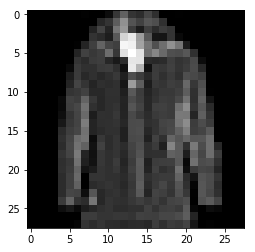

In [19]:
plt.imshow(train_dataset[19][0].numpy().reshape(28,28), cmap='gray')

In [21]:
train_dataset[0][1]

9

In [182]:
def test_model(model):
    # model testing
    X = train_dataset[0][0]
    #X = X.flatten()
    #X = X.reshape(1, 1, 28, 28)
    print(X.shape)
    for l in model:
        X = l(X)
        print("Layer {}. X shape: {}".format(l, X.shape))

In [176]:
def fit_model(num_epochs, model):
    for ep in range(num_epochs):
        train_iters, train_passed  = 0, 0
        train_loss, train_acc = 0., 0.

        model.train()
        for X, y in train:
            trainer.zero_grad()
            y_pred = model(X)
            l = loss(y_pred, y)
            l.backward()
            trainer.step()
            train_loss += l.item()
            train_acc += (y_pred.argmax(dim=1) == y).sum().item()
            train_iters += 1
            train_passed += len(X)

        model.eval()
        test_iters, test_passed  = 0, 0
        test_loss, test_acc = 0., 0.
        for X, y in test:
            y_pred = model(X)
            l = loss(y_pred, y)
            test_loss += l.item()
            test_acc += (y_pred.argmax(dim=1) == y).sum().item()
            test_iters += 1
            test_passed += len(X)

        print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
            ep, train_loss / train_iters, train_acc / train_passed,
            test_loss / test_iters, test_acc / test_passed)
        )

In [189]:
# финальная версия с несколькими полносвязанными и dropout слоями
# и с оптимизатором Adam

dropout_probaility = 0.4
 
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 512), 
    #torch.nn.BatchNorm1d(512),
    #torch.nn.Flatten(),
    #torch.nn.BatchNorm1d(512),
    torch.nn.ReLU(),
    
    #torch.nn.Dropout2d(p=dropout_probaility),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout2d(p=dropout_probaility),
    
    torch.nn.Linear(256, 10),
)
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), lr=0.0002)
num_epochs = 30

In [190]:
test_model(model)

torch.Size([1, 28, 28])
Layer Flatten(). X shape: torch.Size([1, 784])
Layer Linear(in_features=784, out_features=512, bias=True). X shape: torch.Size([1, 512])
Layer ReLU(). X shape: torch.Size([1, 512])
Layer Linear(in_features=512, out_features=256, bias=True). X shape: torch.Size([1, 256])
Layer ReLU(). X shape: torch.Size([1, 256])
Layer Dropout2d(p=0.4, inplace=False). X shape: torch.Size([1, 256])
Layer Linear(in_features=256, out_features=10, bias=True). X shape: torch.Size([1, 10])


In [133]:
fit_model(num_epochs, model)

ep: 0, train_loss: 0.9491200462300726, train_acc: 0.6773, test_loss: 0.5631307624280453, test_acc: 0.8025
ep: 1, train_loss: 0.546916217499591, train_acc: 0.8112833333333334, test_loss: 0.4772798165678978, test_acc: 0.831
ep: 2, train_loss: 0.47472974772148946, train_acc: 0.8350166666666666, test_loss: 0.43585155382752416, test_acc: 0.8442
ep: 3, train_loss: 0.4343224730897457, train_acc: 0.8477, test_loss: 0.4148285359144211, test_acc: 0.8504
ep: 4, train_loss: 0.40819196942004754, train_acc: 0.8549166666666667, test_loss: 0.40074727311730385, test_acc: 0.8546
ep: 5, train_loss: 0.3881975104200079, train_acc: 0.86035, test_loss: 0.38604316040873526, test_acc: 0.8595
ep: 6, train_loss: 0.37372823116627146, train_acc: 0.8667166666666667, test_loss: 0.37764753624796865, test_acc: 0.862
ep: 7, train_loss: 0.3592840888398759, train_acc: 0.8727, test_loss: 0.3671405863016844, test_acc: 0.8665
ep: 8, train_loss: 0.3481939888380943, train_acc: 0.8741, test_loss: 0.35880582109093667, test_acc: